In [ ]:
!nvidia-smi

Wed Apr  9 19:06:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        On  |   00000000:41:00.0 Off |                  Off |
|  0%   30C    P8             23W /  450W |       2MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Unsloth: We're in 🤗Hugging Face's official docs! Check out the SFT docs and DPO docs!

https://huggingface.co/docs/trl/main/en/sft_trainer#accelerate-fine-tuning-2x-using-unsloth

In [ ]:
!pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 16.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of fsspec[http] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 147.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.4/481.4 k

In [ ]:
!pip install --upgrade pillow==11.0.0
# this is needed because lower version gave error
# AttributeError: module 'PIL.Image' has no attribute 'ExifTags'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 79.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.3.0
    Uninstalling Pillow-9.3.0:
      Successfully uninstalled Pillow-9.3.0

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


# Load the model

In [ ]:
from unsloth import FastVisionModel
import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch Gemma3ForConditionalGeneration.
🦥 Unsloth Zoo will now patch everything to make training faster!
Unsloth: We'll be using `/tmp/unsloth_compiled_cache` for temporary Unsloth patches.
Standard import failed for UnslothKTOTrainer: No module named 'UnslothKTOTrainer'. Using tempfile instead!


### FastLanguageModel - loader.py

https://github.com/unslothai/unsloth/blob/c9b9a366e7a6110f9d58d5ed8db6bd27bc97fb71/unsloth/models/loader.py#L77

In [ ]:
model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Llama-3.2-11B-Vision-Instruct",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

==((====))==  Unsloth 2025.3.19: Fast Mllama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA GeForce RTX 4090. Num GPUs = 1. Max memory: 23.643 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/375k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

# We now add LoRA adapters for parameter efficient finetuning - this allows us to only efficiently train 1% of all parameters.

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth: Making `model.base_model.model.vision_model.transformer` require gradients


# Data Prep

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("unsloth/Radiology_mini", split="train")

README.md:   0%|          | 0.00/610 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/79.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1978 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/327 [00:00<?, ? examples/s]

### Let's take a look at the dataset, and check what the 1st example shows:

In [ ]:
dataset

Dataset({
    features: ['image', 'image_id', 'caption', 'cui'],
    num_rows: 1978
})

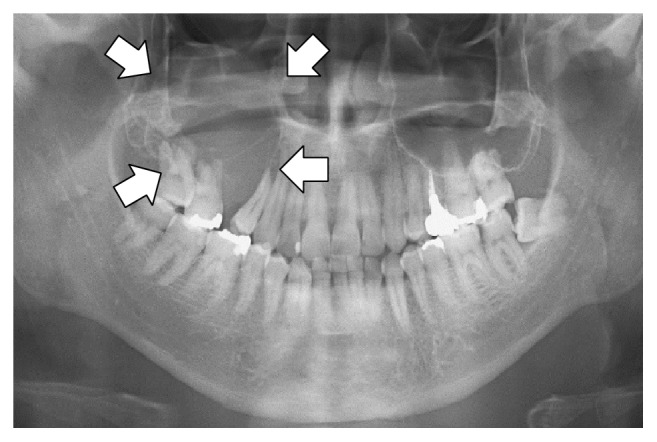

In [ ]:
dataset[0]["image"]

### We will craft an custom instruction asking the VLM to be an expert radiographer. Notice also instead of just 1 instruction, you can add multiple turns to make it a dynamic conversation.

In [ ]:
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

In [ ]:
def convert_to_conversation(sample):
    conversation = [
        {
            "role": "user",
            "content" : [
                {"type": "text", "text" : instruction},
                {"type": "image", "image": sample["image"]}
            ]
        },
        {
            "role": "assistant",
            "content" : [
                {"type": "text", "text": sample["caption"]}
            ]
        }
    ]

    return {"messages": conversation}

In [ ]:
test_sample = convert_to_conversation(dataset[0])

In [ ]:
test_sample

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are an expert radiographer. Describe accurately what you see in this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=657x442>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': 'Panoramic radiography shows an osteolytic lesion in the right posterior maxilla with resorption of the floor of the maxillary sinus (arrows).'}]}]}

### Run for all samples on dataset

In [ ]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

In [ ]:
len(converted_dataset)

1978

In [ ]:
converted_dataset

[{'messages': [{'role': 'user',
    'content': [{'type': 'text',
      'text': 'You are an expert radiographer. Describe accurately what you see in this image.'},
     {'type': 'image',
      'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=657x442>}]},
   {'role': 'assistant',
    'content': [{'type': 'text',
      'text': 'Panoramic radiography shows an osteolytic lesion in the right posterior maxilla with resorption of the floor of the maxillary sinus (arrows).'}]}]},
 {'messages': [{'role': 'user',
    'content': [{'type': 'text',
      'text': 'You are an expert radiographer. Describe accurately what you see in this image.'},
     {'type': 'image',
      'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=750x752>}]},
   {'role': 'assistant',
    'content': [{'type': 'text',
      'text': 'ERCP showing distal CBD compression. ERCP - endoscopic retrograde cholangiopancreatography; CBD - common bile duct'}]}]},
 {'messages': [{'role': 'user',
    'content': [{'t

In [ ]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are an expert radiographer. Describe accurately what you see in this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=657x442>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': 'Panoramic radiography shows an osteolytic lesion in the right posterior maxilla with resorption of the floor of the maxillary sinus (arrows).'}]}]}

# Check model output before finetuning

In [ ]:
FastVisionModel.for_inference(model) # Enable model for inferece

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MllamaForConditionalGeneration(
      (vision_model): MllamaVisionModel(
        (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), padding=valid, bias=False)
        (gated_positional_embedding): MllamaPrecomputedPositionEmbedding(
          (tile_embedding): Embedding(9, 8197120)
        )
        (pre_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (post_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (layernorm_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (layernorm_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (transformer): MllamaVisionEncoder(
          (layers): ModuleList(
            (0-12): 13 x MllamaVisionEncoderLayer(
              (self_attn): MllamaVisionSdpaAttention(
               

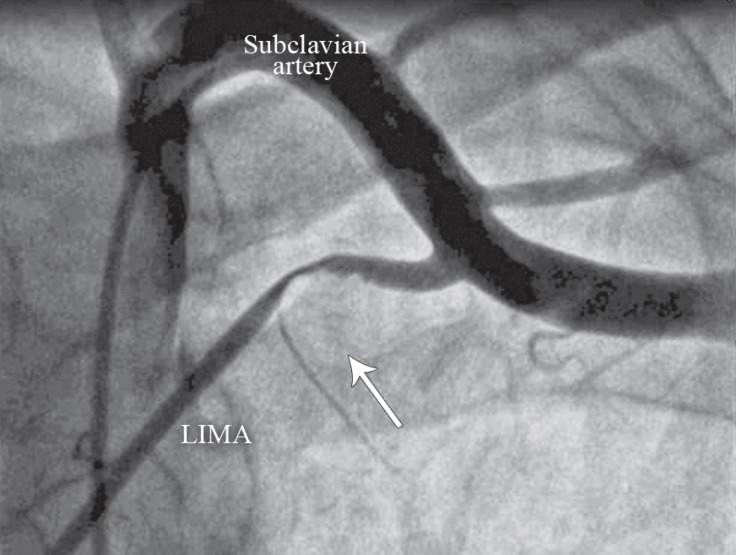

In [ ]:
dataset[5]["image"]

In [ ]:
image = dataset[5]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {
        "role": "user",
        "content" : [
            {"type" : "text", "text" :instruction},
            {"type": "image"}
        ]
    }
]

### Tokenize the input
https://huggingface.co/docs/transformers/en/main_classes/tokenizer

In [ ]:
"""
Converts a list of dictionaries with `"role"` and `"content"` keys to a list of token
ids. This method is intended for use with chat models, and will read the tokenizer's chat_template attribute to
determine the format and control tokens to use when converting.
"""

'\nConverts a list of dictionaries with `"role"` and `"content"` keys to a list of token\nids. This method is intended for use with chat models, and will read the tokenizer\'s chat_template attribute to\ndetermine the format and control tokens to use when converting.\n'

In [ ]:
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)

In [ ]:
"""
Converts a string into a sequence of tokens, using the tokenizer.

Split in words for word-based vocabulary or sub-words for sub-word-based vocabularies
(BPE/SentencePieces/WordPieces). Takes care of added tokens.
"""

'\nConverts a string into a sequence of tokens, using the tokenizer.\n\nSplit in words for word-based vocabulary or sub-words for sub-word-based vocabularies\n(BPE/SentencePieces/WordPieces). Takes care of added tokens.\n'

In [ ]:
input_text

'<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\nYou are an expert radiographer. Describe accurately what you see in this image.<|image|><|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n'

In [ ]:
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

In [ ]:
inputs

{'input_ids': tensor([[128000, 128006,    882, 128007,    271,   2675,    527,    459,   6335,
          12164,  42606,     13,  61885,  30357,   1148,    499,   1518,    304,
            420,   2217,     13, 128256, 128009, 128006,  78191, 128007,    271]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[[-0.7266, -0.7850, -0.8288,  ..., -0.8434, -0.8580, -0.8872],
            [-0.7704, -0.7996, -0.8142,  ..., -0.7850, -0.7996, -0.8142],
            [-0.8288, -0.8288, -0.8142,  ..., -0.8288, -0.8434, -0.8434],
            ...,
            [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
            [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
            [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923]],

           [[-0.6565, -0.7166, -0.7616,  ..., -0.7766, -0.7916, -0.8216],
            [-0.7016, -0.7

### Utilities for generation
https://huggingface.co/docs/transformers/en/internal/generation_utils#transformers.TextStreamer

https://huggingface.co/docs/transformers/main/en/internal/generation_utils

In [ ]:
from transformers import TextStreamer

In [ ]:
text_streamer = TextStreamer(tokenizer, skip_prompt = True)

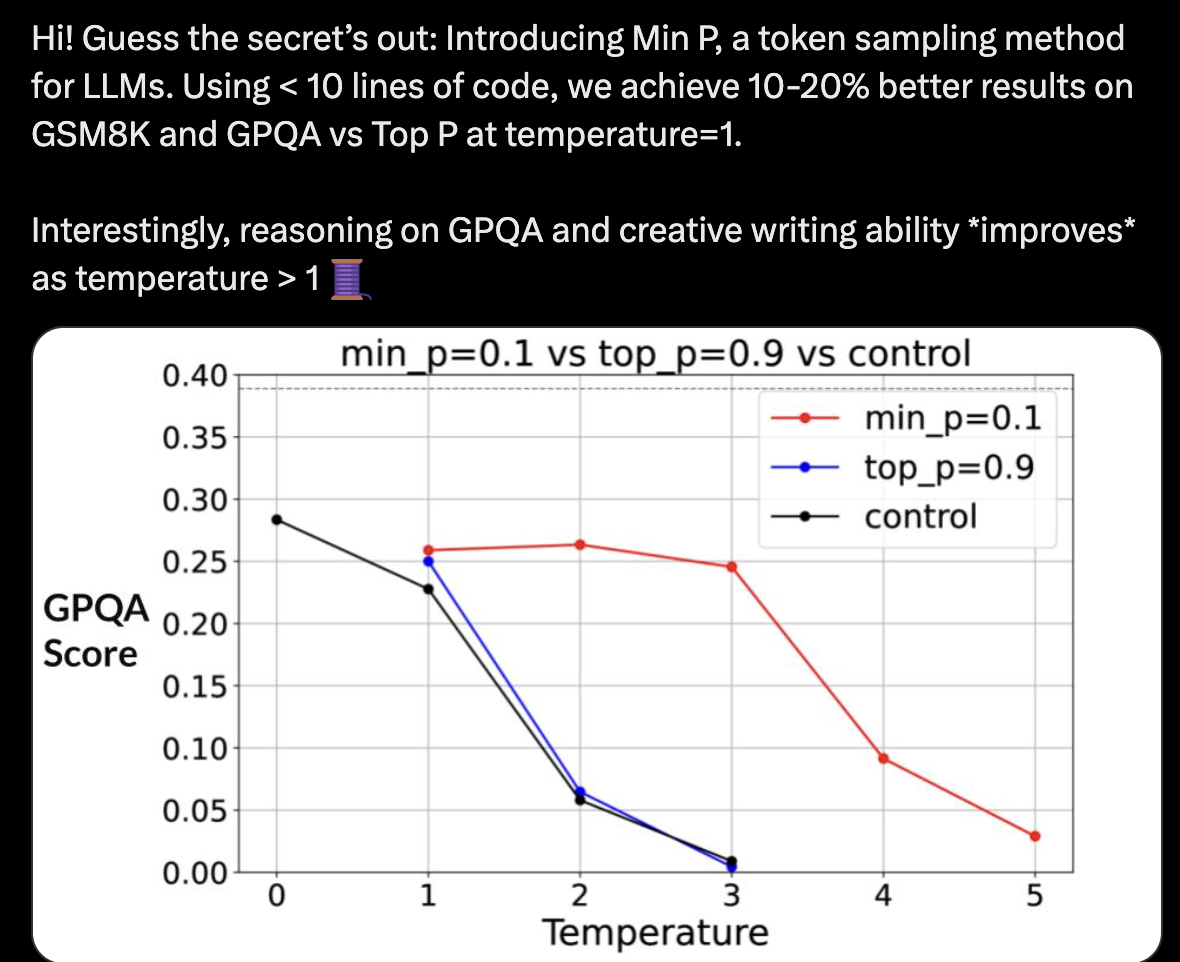

In [ ]:
"""
Unpacks inputs to provide:
input_ids, attention_mask, maybe even pixel_values
"""

_ = model.generate(
    **inputs,
    streamer = text_streamer,
    max_new_tokens = 128,
    use_cache = True,
    temperature = 1.5,
    min_p = 0.1
)

This radiograph appears to be a subclavian angiogram, which involves injecting contrast material into the subclavian artery. The purpose of the test is to assess for signs of narrowing or blockages in the artery. This information will allow a specialist to develop an appropriate diagnosis, treatment, or surgical procedure plan.

This patient is exhibiting some moderate stenosis. This is visible due to the narrowed lumen of the artery where it was once dilated. To the right, the artery is enlarged with an indentation. This may indicate plaque in the subclavian artery that has formed from blood pressure or clots in the arteries and a


In [ ]:
"""
This gave some generic response,
Train the model to get specific responses.
"""

'\nThis gave some generic response, \nTrain the model to get specific responses.\n'

# Train the Model

In [ ]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

In [ ]:
FastVisionModel.for_training(model) # Enable for training!

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MllamaForConditionalGeneration(
      (vision_model): MllamaVisionModel(
        (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), padding=valid, bias=False)
        (gated_positional_embedding): MllamaPrecomputedPositionEmbedding(
          (tile_embedding): Embedding(9, 8197120)
        )
        (pre_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (post_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (layernorm_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (layernorm_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (transformer): MllamaVisionEncoder(
          (layers): ModuleList(
            (0-12): 13 x MllamaVisionEncoderLayer(
              (self_attn): MllamaVisionSdpaAttention(
               

### SFTTrainer()

Trainer for Supervised Fine-Tuning (SFT) method.

This class is a wrapper around the transformers.Trainer class and inherits all of its attributes and methods.

https://huggingface.co/docs/trl/v0.16.1/en/sft_trainer#trl.SFTTrainer

https://huggingface.co/docs/trl/v0.16.1/en/sft_trainer#trl.SFTConfig

https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments

https://github.com/huggingface/transformers/blob/main/src/transformers/training_args.py

In [ ]:
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        # max_steps = 50,
        num_train_epochs = 2, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

### Show current memory stats

In [ ]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA GeForce RTX 4090. Max memory = 23.643 GB.
10.939 GB of memory reserved.


## Start Training

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,978 | Num Epochs = 2 | Total steps = 494
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 67,174,400/11,000,000,000 (0.61% trained)


Step,Training Loss
1,0.980700
2,0.836600
3,1.094800
4,0.742000
5,0.807900
6,0.542800
7,0.816900
8,0.822000
9,0.718600
10,0.586800


# Show final memory and time stats

In [ ]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

5356.4511 seconds used for training.
89.27 minutes used for training.
Peak reserved memory = 11.184 GB.
Peak reserved memory for training = 0.245 GB.
Peak reserved memory % of max memory = 47.304 %.
Peak reserved memory for training % of max memory = 1.036 %.


# Inference

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MllamaForConditionalGeneration(
      (vision_model): MllamaVisionModel(
        (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), padding=valid, bias=False)
        (gated_positional_embedding): MllamaPrecomputedPositionEmbedding(
          (tile_embedding): Embedding(9, 8197120)
        )
        (pre_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (post_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (layernorm_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (layernorm_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (transformer): MllamaVisionEncoder(
          (layers): ModuleList(
            (0-12): 13 x MllamaVisionEncoderLayer(
              (self_attn): MllamaVisionSdpaAttention(
               

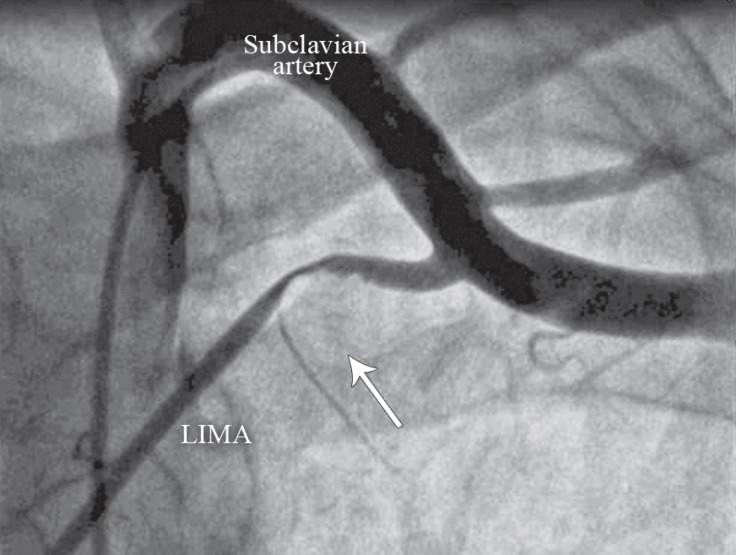

In [ ]:
dataset[5]["image"]

In [ ]:
image = dataset[5]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]

In [ ]:
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)

inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

In [ ]:
from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)

_ = model.generate(
    **inputs,
    streamer = text_streamer,
    max_new_tokens = 128,
    use_cache = True,
    temperature = 1.5,
    min_p = 0.1
)

Left internal mammary artery stent-related stenosis. LIMA, left internal mammary artery.<|eot_id|>


In [ ]:
image = dataset[3]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]

input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)

inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")


text_streamer = TextStreamer(tokenizer, skip_prompt = True)

_ = model.generate(
    **inputs,
    streamer = text_streamer,
    max_new_tokens = 128,
    use_cache = True,
    temperature = 1.5,
    min_p = 0.1
)

Parasternal long axis (SonoCardio) demonstrating large left pericardial effusion<|eot_id|>


# Save the model to local

In [ ]:
# This ONLY saves the LoRA adapters, and not the full model.

model.save_pretrained("lora_model")
tokenizer.save_pretrained("lora_model")

[]

# Run inference on saved adapters

In [ ]:
from unsloth import FastVisionModel

In [ ]:
model, tokenizer = FastVisionModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = True, # Set to False for 16bit LoRA
    )

==((====))==  Unsloth 2025.3.19: Fast Mllama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA GeForce RTX 4090. Num GPUs = 1. Max memory: 23.643 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
FastVisionModel.for_inference(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MllamaForConditionalGeneration(
      (vision_model): MllamaVisionModel(
        (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), padding=valid, bias=False)
        (gated_positional_embedding): MllamaPrecomputedPositionEmbedding(
          (tile_embedding): Embedding(9, 8197120)
        )
        (pre_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (post_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (layernorm_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (layernorm_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (transformer): MllamaVisionEncoder(
          (layers): ModuleList(
            (0-12): 13 x MllamaVisionEncoderLayer(
              (self_attn): MllamaVisionSdpaAttention(
               

In [ ]:
image = dataset[0]["image"]
instruction = "You are an expert radiographer. Describe accurately what you see in this image."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]

input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)

inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")


text_streamer = TextStreamer(tokenizer, skip_prompt = True)

_ = model.generate(
    **inputs,
    streamer = text_streamer,
    max_new_tokens = 128,
    use_cache = True,
    temperature = 1.5,
    min_p = 0.1
)

Orthopantomograph. White arrows showing the area of the third molar in the right and the left mandible.<|eot_id|>


# Merge the lora adapters

In [ ]:
pip install --upgrade huggingface_hub transformers

In [ ]:
import os
os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "0"

In [ ]:
model.save_pretrained_merged("llama-3.2-11B-Radiology_mini-1_epoch", tokenizer,)

Unsloth: Merging weights into 16bit:   0%|          | 0/5 [00:00<?, ?it/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:   0%|          | 0/5 [00:10<?, ?it/s]


RuntimeError: An error occurred while downloading using `hf_transfer`. Consider disabling HF_HUB_ENABLE_HF_TRANSFER for better error handling.

In [ ]:
model.push_to_hub_merged("Rathsam/llama-3.2-11B-Radiology_mini-1_epoch", tokenizer, token = "")